In [2]:
# import basic libraries
import yt
import pickle
import numpy as np
import matplotlib.pyplot as plt
from math import log, log10, pi
from astropy import units as u

# import halo catalogue func
from yt.analysis_modules.halo_analysis.api import *

In [3]:
import tempfile
import shutil
import os

# Create temporary directory for storing files
tmpdir = tempfile.mkdtemp()

In [4]:
# load dataset
ds = yt.load('~/../../tigress/cen/LG4_2048_40pc/RD0070/redshift0070')
dd = ds.all_data()

yt : [INFO     ] 2017-07-25 14:43:30,949 Parameters: current_time              = 158.01757996843
yt : [INFO     ] 2017-07-25 14:43:30,952 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2017-07-25 14:43:30,955 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-07-25 14:43:30,958 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2017-07-25 14:43:30,962 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-07-25 14:43:30,964 Parameters: current_redshift          = 4.9999999832278
yt : [INFO     ] 2017-07-25 14:43:30,966 Parameters: omega_lambda              = 0.712
yt : [INFO     ] 2017-07-25 14:43:30,968 Parameters: omega_matter              = 0.288
yt : [INFO     ] 2017-07-25 14:43:30,970 Parameters: hubble_constant           = 0.6933


In [5]:
ds.print_stats()

Parsing Hierarchy : 100%|██████████| 44216/44216 [00:05<00:00, 8727.06it/s] 
yt : [INFO     ] 2017-07-25 14:43:39,450 Gathering a field list (this may take a moment.)


level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	   256	       2097152	           128
  1	    60	        547304	            82
  2	   187	       2071552	           128
  3	   898	       9903616	           215
  4	  5193	      55377920	           382
  5	 11014	      58419496	           389
  6	 10277	      39511880	           341
  7	  7393	      20631864	           275
  8	  4828	      10668936	           221
  9	  1558	       5499888	           177
 10	  1220	       5897424	           181
 11	  1332	       7614472	           197
----------------------------------------------
   	 44216	     218241504


t = 1.58017580e+02 = 3.75573046e+16 s = 1.19011917e+09 years

Smallest Cell:
	Width: 2.751e-05 Mpc
	Width: 2.751e+01 pc
	Width: 5.675e+06 AU
	Width: 8.489e+19 cm


In [6]:
ds.derived_field_list

[('all', 'age'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'initial_mass'),
 ('all', 'mesh_id'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_positio

In [6]:
# specify boundaries of zoom-in box
# scaling factor multiplied by info from text file 
# units in cm
scaling = 2.22535525e+25 # scales dataset coords to cm

xmin = scaling*0.39319589 * u.cm
ymin = scaling*0.42984636 * u.cm
zmin = scaling*0.41706725 * u.cm

xmax = scaling*0.56298484 * u.cm
ymax = scaling*0.55089246 * u.cm
zmax = scaling*0.56698254 * u.cm

In [8]:
# load halo dataset
halos_ds = yt.load('./LG4_2048_40pc/rd0070/halo_catalogs/catalog/catalog0070_thres160.0.h5')

yt : [INFO     ] 2017-07-25 14:43:50,945 Parameters: current_time              = 3.75573046409e+16
yt : [INFO     ] 2017-07-25 14:43:50,946 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-07-25 14:43:50,947 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-07-25 14:43:50,949 Parameters: domain_right_edge         = [  2.22535525e+25   2.22535525e+25   2.22535525e+25]
yt : [INFO     ] 2017-07-25 14:43:50,950 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-07-25 14:43:50,951 Parameters: current_redshift          = 4.99999998323
yt : [INFO     ] 2017-07-25 14:43:50,951 Parameters: omega_lambda              = 0.712
yt : [INFO     ] 2017-07-25 14:43:50,952 Parameters: omega_matter              = 0.288
yt : [INFO     ] 2017-07-25 14:43:50,953 Parameters: hubble_constant           = 0.6933


In [9]:
halos_ds.field_list

yt : [INFO     ] 2017-07-25 14:43:51,694 Allocating for 9.178e+03 particles (index particle type 'all')
yt : [INFO     ] 2017-07-25 14:43:51,712 Identified 3.025e+03 octs


[('all', 'particle_identifier'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'virial_radius'),
 ('halos', 'particle_identifier'),
 ('halos', 'particle_mass'),
 ('halos', 'particle_position_x'),
 ('halos', 'particle_position_y'),
 ('halos', 'particle_position_z'),
 ('halos', 'virial_radius')]

In [10]:
# Instantiate a catalog using those two paramter files
hc = HaloCatalog(halos_ds=halos_ds, data_ds=ds, output_dir=os.path.join(tmpdir, 'halo_catalog'))
hc.load()

# create projection plot
p = yt.ProjectionPlot(sp, "x", "Dark_Matter_Density", width=(1.5, 'Mpc'))
p.set_zlim(field="Dark_Matter_Density", zmin=1e23, zmax=1e27)
#p.annotate_halos(hc, factor = "particle_mass")
p.annotate_halos(hc)
p.show()

In [133]:
hc.catalog.sort(key= lambda a : a['virial_radius'].to_ndarray())

In [11]:
halo1 = hc.halo_list[675]
halo2 = hc.halo_list[932]

# find first index
index1 = halo1.quantities.get('particle_identifier')

# find parameters of halo1
x1 = halo1.quantities.get('particle_position_x') * u.cm
y1 = halo1.quantities.get('particle_position_y') * u.cm
z1 = halo1.quantities.get('particle_position_z') * u.cm
radius1 = halo1.quantities.get('virial_radius') * u.cm
mass1 = halo1.quantities.get('particle_mass').in_units('Msun')

# find second index
index2 = halo1.quantities.get('particle_identifier')
        
# find parameters of halo2
x2 = halo2.quantities.get('particle_position_x') * u.cm
y2 = halo2.quantities.get('particle_position_y') * u.cm
z2 = halo2.quantities.get('particle_position_z') * u.cm
radius2 = halo2.quantities.get('virial_radius') * u.cm
mass2 = halo2.quantities.get('particle_mass').in_units('Msun')

# calculate dist between halo centers
xdist = np.absolute(x2 - x1)
ydist = np.absolute(y2 - y1)
zdist = np.absolute(z2 - z1)
netdist = (xdist**2 + ydist**2 + zdist**2)**0.5
        


In [10]:
print('distance  = ', netdist)
print('mass1     = ', mass1)
print('mass2     = ', mass2)
print('v_radius1 = ', radius1)
print('v_radius2 = ', radius2)

distance  =  2.9346901327079534e+24 cm
mass1     =  17577704.192752708 Msun
mass2     =  19093023.51971414 Msun
v_radius1 =  3.9085724094299096e+21 cm
v_radius2 =  4.472863867292526e+21 cm


In [25]:
print(xdist, '\n', ydist, '\n', zdist)

3.1682811356454203e+24 cm 
 8.026487563195402e+23 cm 
 9.789640593412424e+23 cm


In [26]:
print(x1, '\n', x2, '\n', y1, '\n', y2)

1.1963596279206126e+25 cm 
 8.795315143560705e+24 cm 
 1.2021895291189851e+25 cm 
 1.121924653487031e+25 cm


In [640]:
dd.quantities.total_mass()

KeyboardInterrupt: 

In [931]:
tot_mass = dd.quantities.total_quantity('particle_mass') * u.g
tot_mass

<Quantity 1.9223398053962725e+46 g>

In [939]:
tot_mass.to('Msun')

<Quantity 9664369842623.662 solMass>

In [936]:
mean_dens2 = tot_mass / (scaling * u.cm)**3
mean_dens2, 200 * mean_dens2 * Omega_scale

(<Quantity 1.7443438859221744e-30 g / cm3>,
 <Quantity 2.930497728349253e-28 g / cm3>)

In [937]:
threshold = 200 * mean_dens2 * Omega_scale
threshold.value, threshold2.value

(2.930497728349253e-28, 7.891257376493692e-26)

In [933]:
# # store threshold in file
# with open('./LG4_2048_40pc/rd0070/rad_threshold0070', 'wb') as file:
#     pickle.dump(threshold, file)

In [943]:
((threshold2 / (200 * Omega_scale)) * (scaling * u.cm)**3).to('Msun')

<Quantity 2602425829305338.5 solMass>

In [63]:
# load threshold from file
with open('./LG4_2048_40pc/rd0070/rad_threshold0070', 'rb') as file:
    threshold = pickle.load(file)

In [12]:
# Instantiate a catalog using those two paramter files
hc = HaloCatalog(halos_ds=halos_ds, data_ds=ds, output_dir=os.path.join(tmpdir, 'halo_catalog'))
hc.load()

In [849]:
sp1.quantities.total_mass().in_units('Msun')

YTArray([  4.52156375e+08,   3.45919695e+09]) Msun

In [11]:
# load python halo list
with open('./LG4_2048_40pc/rd0070/calc_list0070_2000', 'rb') as file1:
    halo_list = pickle.load(file1)
    count = len(halo_list)

In [12]:
# load redshift and Omega values from parameter file
with open('./LG4_2048_40pc/rd0070/redshift0070', 'rt') as param_file:
    param_contents = param_file.read()
    
    #redshift
    cindex1 = param_contents.find('CosmologyCurrentRedshift')
    cindex_eq = param_contents.find('=', cindex1)
    cindex2 = param_contents.find('\n', cindex_eq, cindex_eq + 100)
    redshift = float(param_contents[cindex_eq+2:cindex2])
    
    # omega_m
    cindex1 = param_contents.find('CosmologyOmegaMatterNow')
    cindex_eq = param_contents.find('=', cindex1)
    cindex2 = param_contents.find('\n', cindex_eq, cindex_eq + 100)
    omega_m = float(param_contents[cindex_eq+2:cindex2])
    
    # hubble const now
    cindex1 = param_contents.find('CosmologyHubbleConstantNow')
    cindex_eq = param_contents.find('=', cindex1)
    cindex2 = param_contents.find('\n', cindex_eq, cindex_eq + 100)
    hubb_now = float(param_contents[cindex_eq+2:cindex2]) * 100 *(u.km / u.s / u.Mpc)
    
    # cosmological constant
    cindex1 = param_contents.find('CosmologyOmegaLambdaNow')
    cindex_eq = param_contents.find('=', cindex1)
    cindex2 = param_contents.find('\n', cindex_eq, cindex_eq + 100)
    cos_const = float(param_contents[cindex_eq+2:cindex2])
    
    # omega baryon as specified by Renyue
    omega_b = 0.048
    
# calculate hubble const for simulation
hubb_z = hubb_now * ((omega_m * (1 + redshift)**3) + (1 - omega_m))**0.5

# calculate crit density and threshold
GRAV_CONST = (6.67408e-11 * u.m**3 /(u.kg * u.s**2)).to('cm^3*g^-1*s^-2')
crit_dens = (3 * hubb_z**2) / (8 * pi * GRAV_CONST)
omegas = (1 - (omega_b / omega_m))
threshold = 200 * omegas * crit_dens

# min and max bounds for radial profile
# min = 1 kpc proper
# max = 100 kpc proper
# convert to centimeters value (without astropy units)
rad_min = 1 * u.kpc
rad_max = 100 * u.kpc

rad_min = rad_min.to('cm').value
rad_max = rad_max.to('cm').value

In [13]:
hubb_now, hubb_z, crit_dens.to('g/cm^3'), threshold.to('g/cm^3'), rad_min, rad_max

(<Quantity 69.33 km / (Mpc s)>,
 <Quantity 549.940311561587 km / (Mpc s)>,
 <Quantity 5.680937446701595e-28 g / cm3>,
 <Quantity 9.468229077835992e-26 g / cm3>,
 3.085677581467192e+21,
 3.085677581467192e+23)

In [12]:
print(redshift, omega_m, hubb_now, cos_const)


4.9999999832278 0.288 69.33 km / (Mpc s) 0.712


In [105]:
desired_ind = 0
ind = 0
for halo in halo_list:
    if halo[0] == 8337:
        desired_ind = ind
    
    ind += 1
desired_ind
halo_list[1017][0]

1017

In [49]:
ds.derived_field_list

[('all', 'age'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'initial_mass'),
 ('all', 'mesh_id'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_positio

In [14]:
# successes: 8571, 8642, 2
# noteworthy halos: 9101, 8651, 8400

halo1 = halo_list[8]
# find parameters of halo
index1 = halo1[0]
x1 = halo1[2]
y1 = halo1[3]
z1 = halo1[4]
center = [(x1/scaling).value, (y1/scaling).value, (z1/scaling).value]
mass1 = halo1[5] # new mass
radius1 = halo1[7] # new radius

print(x1.to('kpc'))
print(y1.to('kpc'))
print(z1.to('kpc'))
if xmin <= x1 < xmax and ymin <= y1 < ymax and zmin <= z1 < zmax:
    print('Inside')
else:
    print('Outside')
print(index1)
print(radius1)

print(mass1.to('Msun'))
print((xmin.to('kpc').value, ymin.to('kpc').value, zmin.to('kpc').value))
print((xmax.to('kpc').value, ymax.to('kpc').value, zmax.to('kpc').value))

3546.7587260648124 kpc
3862.7075730127353 kpc
3130.206147946554 kpc
Inside
8
11.480667172855236 kpc
10637388257.198713 solMass
(2835.683622116713, 3100.002604499464, 3007.8411301457318)
(4060.1820387491807, 3972.9731823229044, 4089.012992236858)


In [17]:
sp1 = ds.sphere(center, (100, 'kpc'))
rho_min, rho_max = sp1.quantities.extrema("density")
threshold.value, rho_min, rho_max

stellar_sp1 = sp1.cut_region(["obj[('all', 'particle_type')] == 2"])

In [18]:
stel = sp1['particle_type']  

print(stel)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.] dimensionless


In [68]:
# kpc to cm: 3.086e+21
profiled_value = 'Dark_Matter_Density'
rp = yt.create_profile(sp1, 'radius', profiled_value, #accumulation=True, 
                           units = {'radius': 'cm', profiled_value: 'g/cm**3'}, 
                           logs = {'radius': True, profiled_value: True}, 
                           n_bins = 64, 
                           weight_field='cell_volume',
                           extrema = {'radius': (rad_min, 10*radius1.to('cm').value)})

In [69]:
# bool_mask = rp['Dark_Matter_Density'] > threshold.to('g/cm^3').value
# print(rp['Dark_Matter_Density'])
# print(bool_mask)
# print(rp['Dark_Matter_Density'][bool_mask])
# print(rp.x[bool_mask])

print(rad_min, rad_max)
print(rp[profiled_value])
print(rp.x)

3.085677581467192e+21 2.571397991743993e+23
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   4.61169579e-28   0.00000000e+00   0.00000000e+00   0.000

In [71]:
# find radius and density where density > threshold
thresh_rad = rp.x[bool_mask]
thresh_dens = rp['Dark_Matter_Density'][bool_mask]

if thresh_rad.size > 0:
    print(thresh_rad[-1].to('kpc').value)
    print(thresh_rad[-1].value / rad_val)
else:
    print('All False')



NameError: name 'bool_mask' is not defined

In [579]:
rad1 = thresh_rad[-1]
dens1 = thresh_dens[-1]

print(rad1)
print(dens1)

index = np.where(rp['Dark_Matter_Density']==dens1)
print(index[0][0] + 1)
print(thresh_rad.size)
print(rp.x.size)
print(index[0][0] + 1 == rp.x.size)
rp['Dark_Matter_Density'][index[0]] * u.g / (u.cm**3)


1.5678228457399395 kpc
9.809158113927795e-26 g/cm**3
7
4
64
False


<Quantity [  9.80915811e-26] g / cm3>

In [580]:
# check if density is ever above threshold
if thresh_rad.size > 1:
    # initialize appended quantities
    new_mass = 0 * u.g
    new_rad = 0 * u.cm

    # find boundary radius and density at that radius, and index of that bin 
    rad1 = thresh_rad[-1] * u.cm
    dens1 = thresh_dens[-1] * u.g / (u.cm**3)
    index1 = np.where(rp['Dark_Matter_Density']==thresh_dens[-1])[0]

    # in the case that all density are above threshold
    if index1[0] + 1 == rp.x.size:
        print('method1')
        new_rad = thresh_rad[-1] * u.cm
        new_dens = thresh_dens[-1] * u.g / (u.cm**3)
    else:
        print('method2')
        rad2 = rp.x[index1 + 1][0] * u.cm
        dens2 = rp['Dark_Matter_Density'][index1[0] + 1] * u.g / (u.cm**3)

        # use interpolation to find new radius and new density
        new_rad = ((threshold - dens2)*rad1 + (dens1 - threshold)*rad2) / (dens1 - dens2)
        new_dens = threshold


    # find new mass = dens * vol
    new_mass = new_dens * (4/3 * pi * (new_rad**3))

    # scale by omegas
    new_mass = new_mass / omegas

method2


In [581]:
new_mass.to('Msun'), type(new_mass), new_rad.to('kpc'), new_dens, rad1, rad2, dens1, dens2


(<Quantity 1.0242822805406231e-57 solMass>,
 astropy.units.quantity.Quantity,
 <Quantity 5.262135291349934e-22 kpc>,
 <Quantity 90150854446044.36 g km2 / (cm3 Mpc2)>,
 <Quantity 1.5678228457399395 cm>,
 <Quantity 1.6800019336338101 cm>,
 <Quantity 9.809158113927795e-26 g / cm3>,
 <Quantity 9.125017932427563e-26 g / cm3>)


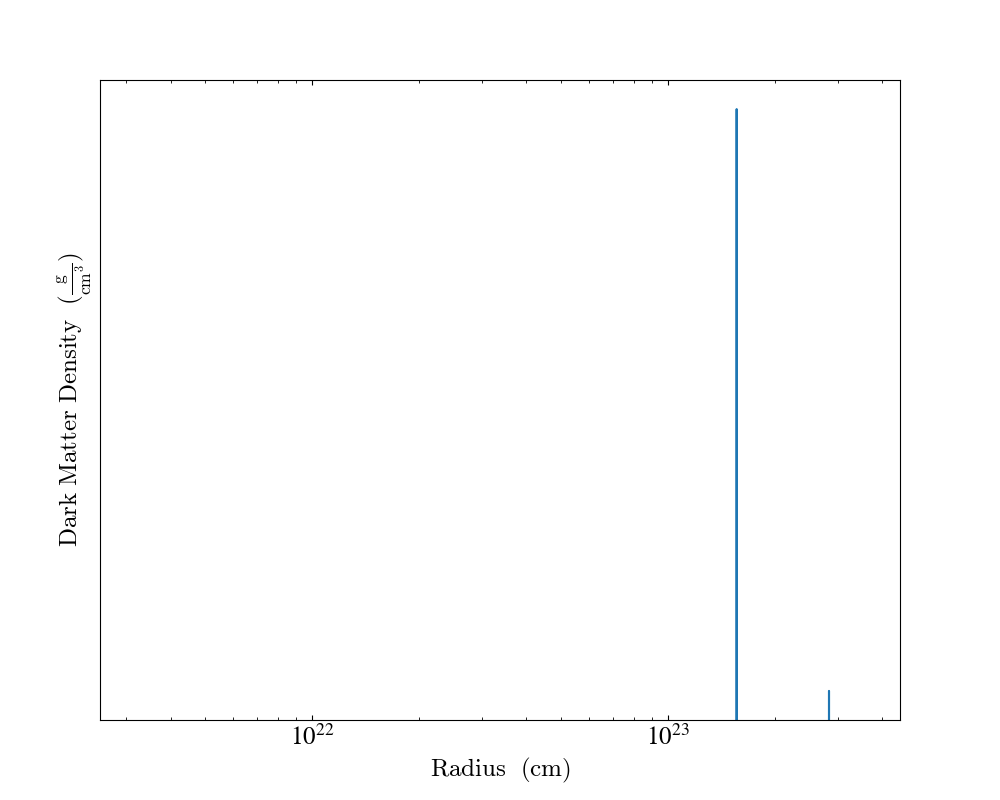

In [70]:
plot = yt.ProfilePlot.from_profiles(rp)

plot.show()

In [834]:
radii_ratio2 = []
count = 0

In [835]:
radii_index2 = []

In [836]:
# find ratios
for halo in hc.halo_list[:200]:
    print('start ', count)
    count += 1
    
    # find coord of halo
    x = halo.quantities.get('particle_position_x') * u.cm
    y = halo.quantities.get('particle_position_y') * u.cm
    z = halo.quantities.get('particle_position_z') * u.cm
    center = [x.value/scaling, y.value/scaling, z.value/scaling]
    index = halo.quantities.get('particle_identifier')
    
    # find values of quantities
    radius = halo.quantities.get('virial_radius') * u.cm
    rad_val = radius.value
    
    # create a sphere around halo
    sp1 = ds.sphere(center, (10*rad_val, 'cm'))
    rad_min, rad_max = 1e-1*rad_val, 10*rad_val
    
    # create radial density profile
    rp = yt.create_profile(sp1, 'radius', 'density', accumulation=True, 
                           units = {'radius': 'cm'}, 
                           logs = {'radius': True, 'density': True}, 
                           n_bins = 128, 
                           extrema = {'radius': (rad_min, rad_max)})
    
    # find max radius where density > threshold
    req_rad = rp.x[rp['density'] > threshold]
    if req_rad.size > 0:
        # find ratio and append to list
        calc_rad = req_rad[-1]
        ratio = calc_rad.value / rad_val
        
        radii_ratio2.append(ratio)
        radii_index2.append(index)

start  0


/home/ygovil/anaconda/anaconda3/lib/python3.6/site-packages/yt/units/yt_array.py:990: RuntimeWarning: invalid value encountered in true_divide
  return super(YTArray, self).__truediv__(ro)
/home/ygovil/anaconda/anaconda3/lib/python3.6/site-packages/yt/units/yt_array.py:1094: RuntimeWarning: invalid value encountered in less
  return super(YTArray, self).__lt__(oth)


start  1
start  2
start  3
start  4
start  5
start  6
start  7
start  8
start  9
start  10
start  11
start  12
start  13
start  14
start  15
start  16
start  17
start  18
start  19
start  20
start  21
start  22
start  23
start  24
start  25
start  26
start  27
start  28
start  29
start  30
start  31
start  32
start  33
start  34
start  35
start  36
start  37
start  38
start  39
start  40
start  41
start  42
start  43
start  44
start  45
start  46
start  47
start  48
start  49
start  50
start  51
start  52
start  53
start  54
start  55
start  56
start  57
start  58
start  59
start  60
start  61
start  62
start  63
start  64
start  65
start  66
start  67
start  68
start  69
start  70
start  71
start  72
start  73
start  74
start  75
start  76
start  77
start  78
start  79
start  80
start  81
start  82
start  83
start  84
start  85
start  86
start  87
start  88
start  89
start  90
start  91
start  92
start  93
start  94
start  95
start  96
start  97
start  98
start  99
start  100
start  1

In [64]:
threshold, threshold2

(<Quantity 7.891257376493692e-26 g / cm3>,
 <Quantity 7.891257376493692e-26 g / cm3>)

In [70]:
# load list from file
with open('./LG4_2048_40pc/rd0070/rad_ratiolist0070', 'rb') as file:
    radii_ratio = pickle.load(file)

In [65]:
radii_ratio = radii_ratio2

In [72]:
min_mass, max_mass = dd.quantities.extrema('particle_mass')

In [188]:
min_mass

5.124386089052739e+36 g

In [75]:
# store min mass to file
with open('./LG4_2048_40pc/rd0070/finest_particle0070', 'wb') as file:
    pickle.dump(min_mass ,file)

In [13]:
count = 0
for halo in halo_list:
    count += 1

print(count)

NameError: name 'halo_list' is not defined

In [114]:
# store halo count to file
with open('./LG4_2048_40pc/rd0070/count_halo0070_160', 'wb') as file:
    pickle.dump(count ,file)

In [154]:
empty2 = np.empty(0)

In [157]:
empty2 = np.append(empty2, mass.to('Msun').value)
empty2 = np.append(empty2, radius.to('kpc').value)
print(empty2)

[ 1005.47986527    30.          1005.47986527    30.          1005.47986527
    30.        ]


In [153]:
mass = 2e36 * u.g
radius = 30 * u.kpc

In [131]:
mass.to('Msun').value

1005.4798652656982

In [147]:
help(hc.halo_list.sort(''))

TypeError: must use keyword argument for key function

In [163]:
halos_ds.field_list

[('all', 'particle_identifier'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'virial_radius'),
 ('halos', 'particle_identifier'),
 ('halos', 'particle_mass'),
 ('halos', 'particle_position_x'),
 ('halos', 'particle_position_y'),
 ('halos', 'particle_position_z'),
 ('halos', 'virial_radius')]

In [164]:
from operator import itemgetter

In [182]:
index = -1 # keep count of index
for halo in hc.halo_list:
    # increment index
    index += 1
      
    # find parameters of halo
    x = halo.quantities.get('particle_position_x') * u.cm
    y = halo.quantities.get('particle_position_y') * u.cm
    z = halo.quantities.get('particle_position_z') * u.cm
    mass = halo.quantities.get('particle_mass').in_units('Msun') * u.Msun
    radius = halo.quantities.get('virial_radius') * u.cm
    
    # create halo info tuple
    halo_info = (index, x, y, z, mass, radius)
    
    # append info tuple
    halo_list.append(halo_info)



In [183]:
halo_list.sort(key=itemgetter(4), reverse = True)

In [14]:
# load halo list to file
with open('./LG4_2048_40pc/rd0070/halo_list0070', 'rb') as halofile:
    halo_list = pickle.load(halofile)

In [15]:
# load calc list 2000 from file
with open('./LG4_2048_40pc/rd0070/calc_list0070_2000', 'rb') as calcfile:
    new_calc_list = pickle.load(calcfile)

In [107]:
halo_list

[[0,
  9177,
  <Quantity 3305.8262831755724 kpc>,
  <Quantity 3322.761866996849 kpc>,
  <Quantity 3961.388738873247 kpc>,
  <Quantity 9436427.737566702 solMass>,
  <Quantity 25690420805.269367 solMass>,
  <Quantity 1.1031248364397543 kpc>,
  <Quantity 26.775585438851632 kpc>,
  1090,
  0,
  0,
  0,
  0,
  0],
 [1,
  9176,
  <Quantity 3471.321237540266 kpc>,
  <Quantity 3401.079827252028 kpc>,
  <Quantity 3400.2140118338907 kpc>,
  <Quantity 15366540497.776512 solMass>,
  <Quantity 11922229400.652966 solMass>,
  <Quantity 12.978190902719229 kpc>,
  <Quantity 17.092227807976773 kpc>,
  -1,
  <Quantity 1282781352.449772 solMass>,
  <Quantity 1032332655.8215156 solMass>,
  <Quantity 8409418400841380.0 s>,
  2.305267295890719,
  <Quantity 8409418400841380.0 s>],
 [2,
  9174,
  <Quantity 3234.5723431601455 kpc>,
  <Quantity 3238.272559181017 kpc>,
  <Quantity 3936.3089287070466 kpc>,
  <Quantity 14136653493.151896 solMass>,
  <Quantity 11434599641.2193 solMass>,
  <Quantity 12.62227566810239

In [18]:
min_halo = new_calc_list[0]
for item in min_halo:
    print(item)

0
9177
3305.8262831755724 kpc
3322.761866996849 kpc
3961.388738873247 kpc
9436427.737566702 solMass
25690420805.269367 solMass
1.1031248364397543 kpc
26.775585438851632 kpc


In [552]:
# load finest particle from file
with open('./LG4_2048_40pc/rd0070/finest_particle0070', 'rb') as finefile:
    finest_particle = pickle.load(finefile)

In [84]:
halo = halo_list[37]
# find parameters of halo
x = halo[2]
y = halo[3]
z = halo[4]
center = [x.value/scaling, y.value/scaling, z.value/scaling]
halo_mass = halo[5] # new mass
radius = 2*halo[7] # new radius

# check if halo is inside zoom-in box
if xmin <= x < xmax and ymin <= y < ymax and zmin <= z < zmax:
    pass
else:
    raise 

# check that radius is not 0
if radius == 0:
    raise

# create a sphere data object with halo position and radius
sp = ds.sphere(center, (rad_max, 'cm'))

# find the two output masses from TotalMass in Msun
masses = sp.quantities.total_mass()
gas_mass = masses[0]
particle_mass = masses[1]
gas_mass = gas_mass.to('Msun')
particle_mass = particle_mass.to('Msun')

# # find stellar mass using total particle mass from TotalMass
# stellar_mass = particle_mass - halo_mass

# # find the two ratios
# ratio1 = gas_mass / halo_mass
# ratio2 = stellar_mass / halo_mass

print(masses, gas_mass.value, particle_mass.value)
print(radius, halo_mass, '\n',center)

[  1.74091938e+43   5.92396612e+43] g 8755308264.584818 29792390223.523495
15.021727133350323 kpc 2978538719.08852 solMass 
 [1.5885624256561395e-22, 1.6199173732317531e-22, 1.4749387335783693e-22]


In [85]:
# find stellar mass in second way 
# find boolean mask for stellar particles
stellar_mask = (sp[('all', 'particle_type')] == 2)
# create parallel arrays of masses and postions
mass_array = sp[('all', 'particle_mass')][stellar_mask] 
xarray = sp[('all', 'particle_position_x')][stellar_mask]
yarray = sp[('all', 'particle_position_y')][stellar_mask]
zarray = sp[('all', 'particle_position_z')][stellar_mask]

# create distance from center array
distarray = []
for i in range(0, len(mass_array)):
    pass


In [86]:
xarray

YTArray([], dtype=float64) code_length

In [87]:
sp['particle_type']

YTArray([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]) dimensionless

In [20]:
stellar_mass = sp.quantities.total_quantity([("deposit", "io_mass")])
all_mass = sp.quantities.total_quantity([("deposit", "all_mass")])
gas_mass = sp.quantities.total_quantity([("gas", "cell_mass")])
stellar_mass, all_mass, gas_mass

(4.9366384356469214e+42 g, 4.9366384356469214e+42 g, 4.95492268946114e+41 g)

In [21]:
radius.to('kpc')

<Quantity 6.693761860043864 kpc>

In [22]:
ds.derived_field_list

[('all', 'age'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'initial_mass'),
 ('all', 'mesh_id'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_positio

In [23]:
time_now = 1 / hubb_z
time_now.to('year')

<Quantity 1777996995.522353 yr>

In [26]:
ave_time_created = sp.quantities.weighted_average_quantity('creation_time', 'io_mass')

In [27]:
ave_time_created

0.0 s

In [19]:
halo = halo_list[37]
# find parameters of halo
x = halo[2]
y = halo[3]
z = halo[4]
center = [x.value/scaling, y.value/scaling, z.value/scaling]
halo_mass = halo[5] # new mass
radius = halo[7] # new radius
stel_mass = halo[11]

# create a sphere data object with halo position and radius
sp = ds.sphere(center, (rad_max, 'cm'))
